In [ ]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats

# Set visual styles
sns.set_theme(style="whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 120)

# File paths
DATA_PATH = Path('Human_Development_Index_Dataset.csv')
OUTPUT_DIR = Path('.')

print("=" * 80)
print("HDI DATASET ANALYSIS - COMPLETE VERSION")
print("=" * 80)

# ============================================================================
# HELPER FUNCTIONS
# ============================================================================

def load_data(file_path):
    """Load the HDI dataset, trying different encodings if needed."""
    encodings_to_try = ['utf-8', 'latin1', 'cp1252']

    for encoding in encodings_to_try:
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            print(f"[SUCCESS] Loaded data using {encoding} encoding")
            return df
        except:
            continue

    raise Exception("Could not load the file with any encoding")


def clean_data(df):
    """Clean the dataset by handling missing values and fixing data types."""
    df = df.copy()

    # Replace various missing value indicators with NaN
    missing_indicators = ['NA', 'N/A', '–', '-', '']
    df.replace(missing_indicators, np.nan, inplace=True)

    # Clean country names (remove extra spaces)
    if 'country' in df.columns:
        df['country'] = df['country'].str.strip()

    # Convert year to integer
    if 'year' in df.columns:
        df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')

    # Convert numeric columns to proper numbers
    numeric_columns = ['hdi', 'life_expectancy', 'gross_inc_percap',
                      'gender_development', 'gender_inequality', 'pop_millions']

    for column in numeric_columns:
        if column in df.columns:
            df[column] = pd.to_numeric(df[column], errors='coerce')

    # Remove duplicate rows
    df.drop_duplicates(inplace=True)

    print("[SUCCESS] Data cleaning completed")
    return df


def categorize_hdi(hdi_value):
    """Categorize HDI into development levels."""
    if pd.isna(hdi_value):
        return np.nan
    elif hdi_value < 0.550:
        return 'Low'
    elif hdi_value < 0.700:
        return 'Medium'
    elif hdi_value < 0.800:
        return 'High'
    else:
        return 'Very High'


# ============================================================================
# LOAD AND CLEAN DATA
# ============================================================================

print("\n[STEP 1] LOADING AND CLEANING DATA...")
print("=" * 80)
df_raw = load_data(DATA_PATH)
df = clean_data(df_raw)

print(f"\nDataset Shape: {df.shape[0]} rows x {df.shape[1]} columns")
print(f"Year Range: {int(df['year'].min())} to {int(df['year'].max())}")
print(f"Columns: {list(df.columns)}")


# ============================================================================

HDI DATASET ANALYSIS - COMPLETE VERSION

[STEP 1] LOADING AND CLEANING DATA...
[SUCCESS] Loaded data using latin1 encoding
[SUCCESS] Data cleaning completed

Dataset Shape: 6798 rows x 30 columns
Year Range: 1990 to 2022
Columns: ['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy', 'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m', 'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m', 'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m', 'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m', 'gender_development', 'gender_inequality', 'secondary_education_f_%', 'secondary_education_m_%', 'seats_in_parliament_f_%', 'seats_in_parliament_m_%', 'labour_participation_f_%', 'labour_participation_m_%', 'co2_emission_tons', 'mat_footprint_percap_tons']


In [ ]:
# PROBLEM 1A: Single Year HDI Exploration (2022)
# ============================================================================

print("\n\n" + "=" * 80)
print("PROBLEM 1A: SINGLE YEAR HDI EXPLORATION (2022)")
print("=" * 80)




PROBLEM 1A: SINGLE YEAR HDI EXPLORATION (2022)


In [ ]:
# Task 1: Extract Latest Year
print("\n[TASK 1] Extracting 2022 data...")
df_2022 = df[df['year'] == 2022].copy()
print(f"2022 Dataset: {len(df_2022)} countries")

# Remove rows where HDI is missing
df_2022 = df_2022.dropna(subset=['hdi'])
print(f"After removing missing HDI: {len(df_2022)} countries")



[TASK 1] Extracting 2022 data...
2022 Dataset: 206 countries
After removing missing HDI: 204 countries


In [ ]:
# Task 2: Data Exploration - FIRST 10 ROWS (as required)
print("\n[TASK 2] Data Exploration")
print("\nFirst 10 rows:")
print(df_2022[['country', 'hdi', 'life_expectancy', 'gross_inc_percap']].head(10))

print(f"\nNumber of rows: {df_2022.shape[0]}")
print(f"Number of columns: {df_2022.shape[1]}")
print(f"\nColumn names and data types:")
print(df_2022.dtypes)



[TASK 2] Data Exploration

First 10 rows:
                 country    hdi  life_expectancy  gross_inc_percap
32           Afghanistan  0.462           62.879       1335.205733
65               Albania  0.789           76.833      15293.326510
98               Algeria  0.745           77.129      10978.405710
131              Andorra  0.884           83.552      54233.449480
164               Angola  0.591           61.929       5327.788251
197  Antigua and Barbuda  0.826           79.236      18783.965360
230            Argentina  0.849           76.064      22047.971310
263              Armenia  0.786           73.372      15388.299760
296            Australia  0.946           83.579      49257.135200
329              Austria  0.926           82.412      56529.663290

Number of rows: 204
Number of columns: 30

Column names and data types:
Unnamed: 0                     int64
iso3                          object
country                       object
year                           Int64

In [ ]:
# Task 3: Missing Values & Data Cleaning
print("\n[TASK 3] Missing Values Check")
missing_counts = df_2022.isnull().sum()
print("\nMissing values per column:")
print(missing_counts[missing_counts > 0])



[TASK 3] Missing Values Check

Missing values per column:
hdi_f                        11
hdi_m                        11
gross_inc_percap_f           11
gross_inc_percap_m           11
gender_development           11
gender_inequality            27
secondary_education_f_%      15
secondary_education_m_%      15
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     11
labour_participation_m_%     11
co2_emission_tons             1
mat_footprint_percap_tons    39
dtype: int64


In [ ]:
# Task 4: Basic Statistics
print("\n[TASK 4] Basic Statistics for HDI in 2022")
print(f"Mean HDI: {df_2022['hdi'].mean():.4f}")
print(f"Median HDI: {df_2022['hdi'].median():.4f}")
print(f"Standard Deviation: {df_2022['hdi'].std():.4f}")

best_country = df_2022.loc[df_2022['hdi'].idxmax()]
worst_country = df_2022.loc[df_2022['hdi'].idxmin()]

print(f"\nHighest HDI: {best_country['country']} ({best_country['hdi']:.3f})")
print(f"Lowest HDI: {worst_country['country']} ({worst_country['hdi']:.3f})")



[TASK 4] Basic Statistics for HDI in 2022
Mean HDI: 0.7229
Median HDI: 0.7395
Standard Deviation: 0.1530

Highest HDI: Switzerland (0.967)
Lowest HDI: Somalia (0.380)


In [ ]:
# Task 5: Filtering and Sorting
print("\n[TASK 5] Filtering and Sorting")
df_high_performers = df_2022[df_2022['hdi'] > 0.800].copy()
df_high_performers = df_high_performers.sort_values('gross_inc_percap', ascending=False)

print(f"\nCountries with HDI > 0.800: {len(df_high_performers)}")
print("\nTop 10 by Gross National Income per Capita:")
print(df_high_performers[['country', 'hdi', 'gross_inc_percap']].head(10))



[TASK 5] Filtering and Sorting

Countries with HDI > 0.800: 71

Top 10 by Gross National Income per Capita:
                     country    hdi  gross_inc_percap
3332           Liechtenstein  0.942      146673.24150
4718                   Qatar  0.875       95944.37754
5213               Singapore  0.949       88761.14559
2705                 Ireland  0.950       87467.51391
3398              Luxembourg  0.927       78554.23640
6104    United Arab Emirates  0.937       74103.71494
5609             Switzerland  0.967       69432.78669
4322                  Norway  0.966       69189.76165
6170           United States  0.927       65564.93798
2474  Hong Kong, China (SAR)  0.956       62485.50516


In [ ]:
# Task 6: Adding HDI Category Column
print("\n[TASK 6] Adding HDI Category Column")
df_2022['development_category'] = df_2022['hdi'].apply(categorize_hdi)

print("\nHDI Category Distribution:")
print(df_2022['development_category'].value_counts())

# Save the 2022 data with categories
output_file = OUTPUT_DIR / 'HDI_category_added.csv'
df_2022.to_csv(output_file, index=False)
print(f"\n[SAVED] {output_file}")


# ============================================================================


[TASK 6] Adding HDI Category Column

HDI Category Distribution:
development_category
Very High    71
High         54
Medium       44
Low          35
Name: count, dtype: int64

[SAVED] HDI_category_added.csv


In [ ]:
# PROBLEM 1B: HDI Trends (2020-2022)
# ============================================================================

print("\n\n" + "=" * 80)
print("PROBLEM 1B: HDI TRENDS (2020-2022)")
print("=" * 80)




PROBLEM 1B: HDI TRENDS (2020-2022)


In [ ]:
# Task 1: Data Extraction and Saving - CORRECT FILENAME
print("\n[TASK 1] Extracting 2020-2022 data...")
df_3years = df[df['year'].isin([2020, 2021, 2022])].copy()
print(f"3-Year Dataset: {len(df_3years)} records")

# Save with CORRECT filename as required
three_year_file = OUTPUT_DIR / 'HDI_problem1B.csv'
df_3years.to_csv(three_year_file, index=False)
print(f"[SAVED] {three_year_file}")



[TASK 1] Extracting 2020-2022 data...
3-Year Dataset: 618 records
[SAVED] HDI_problem1B.csv


In [ ]:
# Task 2: Data Cleaning
print("\n[TASK 2] Data Cleaning")
df_3years = df_3years.dropna(subset=['hdi', 'country', 'year'])
print(f"After removing missing essential values: {len(df_3years)} records")



[TASK 2] Data Cleaning
After removing missing essential values: 610 records



[TASK 3A] Creating Line Chart - Country Trends


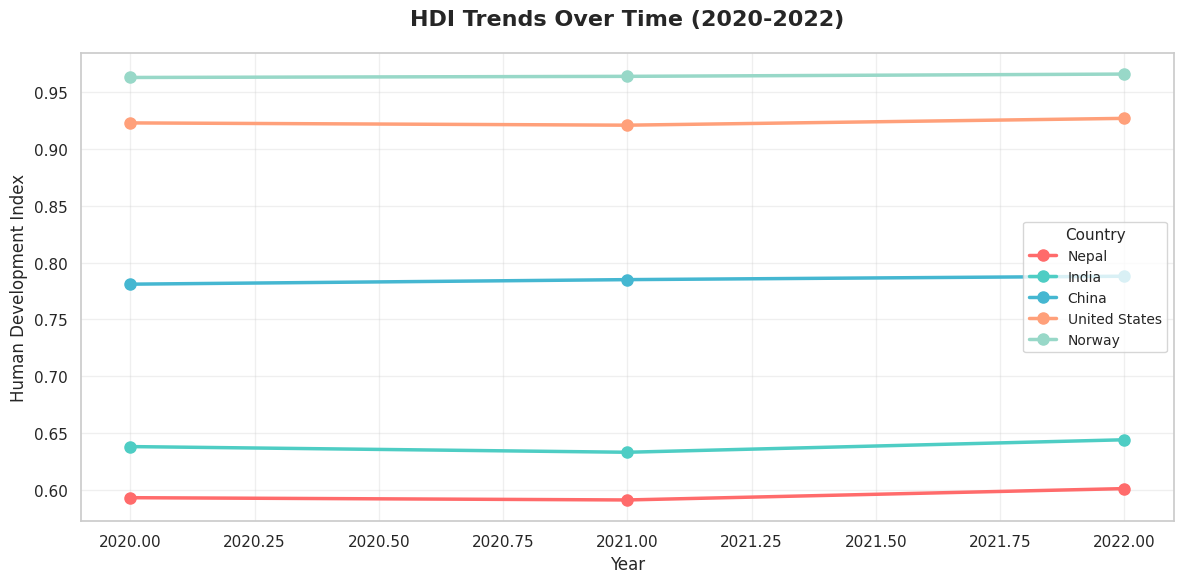

In [ ]:
# Task 3A: Line Chart - HDI Trend
print("\n[TASK 3A] Creating Line Chart - Country Trends")
selected_countries = ['Nepal', 'India', 'China', 'United States', 'Norway']
df_trend = df_3years[df_3years['country'].isin(selected_countries)]

plt.figure(figsize=(12, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

for i, country in enumerate(selected_countries):
    df_country = df_trend[df_trend['country'] == country]
    plt.plot(df_country['year'], df_country['hdi'],
             marker='o', linewidth=2.5, markersize=8,
             label=country, color=colors[i])

plt.title('HDI Trends Over Time (2020-2022)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Human Development Index', fontsize=12)
plt.legend(title='Country', fontsize=10, title_fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



[TASK 3B-1] Creating Bar Chart - Average HDI by Region


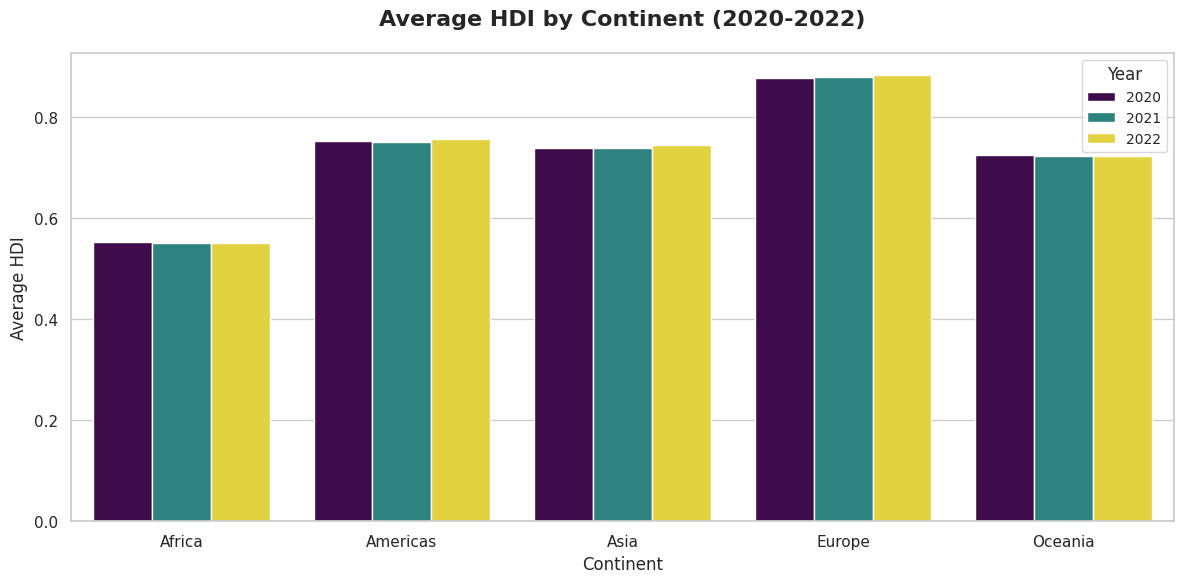

In [ ]:
# Task 3B: Bar Chart - Regional Comparison
print("\n[TASK 3B-1] Creating Bar Chart - Average HDI by Region")

# Map countries to continents using ISO3 codes
iso3_to_continent = {
    # Asia
    "AFG":"Asia", "ARM":"Asia", "AZE":"Asia", "BHR":"Asia", "BGD":"Asia",
    "BTN":"Asia", "BRN":"Asia", "KHM":"Asia", "CHN":"Asia", "IND":"Asia",
    "IDN":"Asia", "IRN":"Asia", "IRQ":"Asia", "ISR":"Asia", "JPN":"Asia",
    "JOR":"Asia", "KAZ":"Asia", "KWT":"Asia", "KGZ":"Asia", "LAO":"Asia",
    "LBN":"Asia", "MYS":"Asia", "MDV":"Asia", "MNG":"Asia", "MMR":"Asia",
    "NPL":"Asia", "OMN":"Asia", "PAK":"Asia", "PHL":"Asia", "QAT":"Asia",
    "SAU":"Asia", "SGP":"Asia", "KOR":"Asia", "LKA":"Asia", "SYR":"Asia",
    "TJK":"Asia", "THA":"Asia", "TUR":"Asia", "TKM":"Asia", "ARE":"Asia",
    "UZB":"Asia", "VNM":"Asia", "YEM":"Asia", "PSE":"Asia",

    # Europe
    "ALB":"Europe", "AUT":"Europe", "BEL":"Europe", "BGR":"Europe",
    "BIH":"Europe", "BLR":"Europe", "CHE":"Europe", "CZE":"Europe",
    "DEU":"Europe", "DNK":"Europe", "ESP":"Europe", "EST":"Europe",
    "FIN":"Europe", "FRA":"Europe", "GBR":"Europe", "GRC":"Europe",
    "HRV":"Europe", "HUN":"Europe", "IRL":"Europe", "ISL":"Europe",
    "ITA":"Europe", "LTU":"Europe", "LUX":"Europe", "LVA":"Europe",
    "MDA":"Europe", "MKD":"Europe", "MLT":"Europe", "MNE":"Europe",
    "NLD":"Europe", "NOR":"Europe", "POL":"Europe", "PRT":"Europe",
    "ROU":"Europe", "RUS":"Europe", "SRB":"Europe", "SVK":"Europe",
    "SVN":"Europe", "SWE":"Europe", "UKR":"Europe",

    # Africa
    "DZA":"Africa", "AGO":"Africa", "BEN":"Africa", "BFA":"Africa",
    "BWA":"Africa", "CAF":"Africa", "CIV":"Africa", "CMR":"Africa",
    "COD":"Africa", "COG":"Africa", "COM":"Africa", "DJI":"Africa",
    "EGY":"Africa", "ETH":"Africa", "GAB":"Africa", "GHA":"Africa",
    "GIN":"Africa", "GMB":"Africa", "GNB":"Africa", "KEN":"Africa",
    "LBR":"Africa", "LBY":"Africa", "LSO":"Africa", "MAR":"Africa",
    "MDG":"Africa", "MLI":"Africa", "MOZ":"Africa", "MRT":"Africa",
    "MUS":"Africa", "MWI":"Africa", "NAM":"Africa", "NER":"Africa",
    "NGA":"Africa", "RWA":"Africa", "SDN":"Africa", "SEN":"Africa",
    "SLE":"Africa", "SOM":"Africa", "SSD":"Africa", "TCD":"Africa",
    "TGO":"Africa", "TUN":"Africa", "TZA":"Africa", "UGA":"Africa",
    "ZAF":"Africa", "ZMB":"Africa", "ZWE":"Africa",

    # Americas
    "ARG":"Americas", "BHS":"Americas", "BLZ":"Americas", "BOL":"Americas",
    "BRA":"Americas", "BRB":"Americas", "CAN":"Americas", "CHL":"Americas",
    "COL":"Americas", "CRI":"Americas", "CUB":"Americas", "DOM":"Americas",
    "ECU":"Americas", "GTM":"Americas", "GUY":"Americas", "HND":"Americas",
    "HTI":"Americas", "JAM":"Americas", "MEX":"Americas", "NIC":"Americas",
    "PAN":"Americas", "PER":"Americas", "PRY":"Americas", "SLV":"Americas",
    "SUR":"Americas", "TTO":"Americas", "USA":"Americas", "URY":"Americas",
    "VEN":"Americas",

    # Oceania
    "AUS":"Oceania", "FJI":"Oceania", "NZL":"Oceania", "PNG":"Oceania",
    "SLB":"Oceania", "VUT":"Oceania", "WSM":"Oceania"
}

df_3years['continent'] = df_3years['iso3'].map(iso3_to_continent)
df_continent_avg = df_3years.dropna(subset=['continent']).groupby(
    ['continent', 'year'], as_index=False)['hdi'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_continent_avg, x='continent', y='hdi', hue='year', palette='viridis')
plt.title('Average HDI by Continent (2020-2022)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Average HDI', fontsize=12)
plt.legend(title='Year', fontsize=10)
plt.tight_layout()
plt.show()



[TASK 3B-2] Creating Box Plot - HDI Distribution by Year


/tmp/ipython-input-3670171062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_3years, x='year', y='hdi', palette=box_colors)


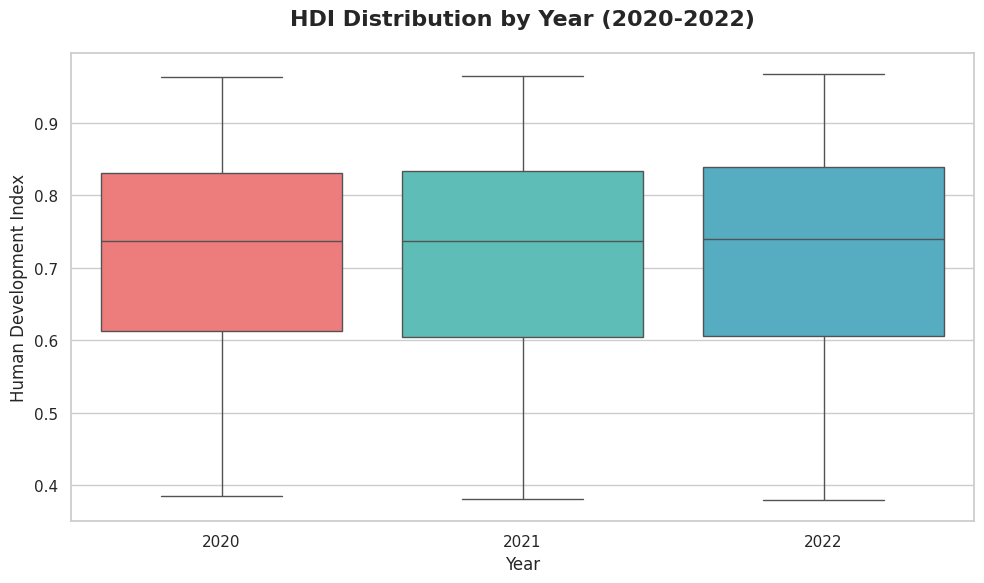

Distribution shows median, quartiles, and outliers for each year


In [ ]:
# Task 3B: Box Plot
print("\n[TASK 3B-2] Creating Box Plot - HDI Distribution by Year")
plt.figure(figsize=(10, 6))
box_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
sns.boxplot(data=df_3years, x='year', y='hdi', palette=box_colors)
plt.title('HDI Distribution by Year (2020-2022)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Human Development Index', fontsize=12)
plt.tight_layout()
plt.show()

print("Distribution shows median, quartiles, and outliers for each year")



[TASK 3B-3] Creating Scatter Plot - HDI vs GNI per Capita


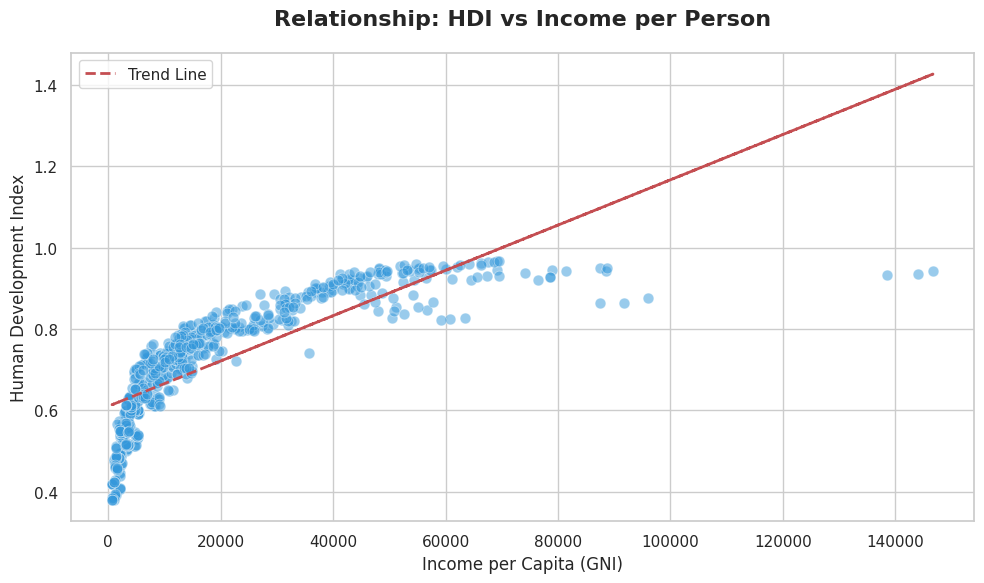

Correlation between HDI and Income: 0.7884


In [ ]:
# Task 3B: Scatter Plot - HDI vs GNI
print("\n[TASK 3B-3] Creating Scatter Plot - HDI vs GNI per Capita")
df_income = df_3years.dropna(subset=['gross_inc_percap', 'hdi'])

plt.figure(figsize=(10, 6))
plt.scatter(df_income['gross_inc_percap'], df_income['hdi'],
           alpha=0.5, c='#3498DB', edgecolors='white', linewidth=0.5, s=60)

# Add trend line
z = np.polyfit(df_income['gross_inc_percap'], df_income['hdi'], 1)
p = np.poly1d(z)
plt.plot(df_income['gross_inc_percap'], p(df_income['gross_inc_percap']),
         "r--", linewidth=2, label='Trend Line')

plt.title('Relationship: HDI vs Income per Person', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Income per Capita (GNI)', fontsize=12)
plt.ylabel('Human Development Index', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

correlation = df_income['hdi'].corr(df_income['gross_inc_percap'])
print(f"Correlation between HDI and Income: {correlation:.4f}")


In [ ]:
# Task 4: Short Analysis Questions
print("\n[TASK 4] Short Analysis Questions")

# Greatest improvement
df_pivot = df_3years.pivot_table(index='country', columns='year', values='hdi', aggfunc='mean')
if 2020 in df_pivot.columns and 2022 in df_pivot.columns:
    df_pivot['hdi_change'] = df_pivot[2022] - df_pivot[2020]
    improvements = df_pivot['hdi_change'].dropna().sort_values(ascending=False)

    print("\nTop 10 Countries with Greatest Improvement (2020 -> 2022):")
    for i, (country, change) in enumerate(improvements.head(10).items(), 1):
        print(f"   {i}. {country}: +{change:.4f}")

    # Countries with decline
    declines = df_pivot[df_pivot['hdi_change'] < 0]['hdi_change'].sort_values()

    if len(declines) > 0:
        print(f"\n{len(declines)} countries experienced HDI decline")
        print("Top 5 declines (possible COVID-19 impact):")
        for i, (country, change) in enumerate(declines.head(5).items(), 1):
            print(f"   {i}. {country}: {change:.4f}")

# Regional analysis
regional_avg = df_3years.dropna(subset=['continent']).groupby('continent')['hdi'].mean().sort_values()
print(f"\nHighest average HDI region: {regional_avg.idxmax()} ({regional_avg.max():.4f})")
print(f"Lowest average HDI region: {regional_avg.idxmin()} ({regional_avg.min():.4f})")

print("\nCOVID-19 Impact Discussion:")
print("The 2020-2022 period includes the COVID-19 pandemic, which affected HDI through:")
print("- Reduced life expectancy due to deaths and healthcare disruptions")
print("- Economic contractions reducing GNI per capita")
print("- School closures affecting education metrics")


# ============================================================================


[TASK 4] Short Analysis Questions

Top 10 Countries with Greatest Improvement (2020 -> 2022):
   1. Andorra: +0.0410
   2. Azerbaijan: +0.0380
   3. Ecuador: +0.0310
   4. Maldives: +0.0250
   5. Mexico: +0.0240
   6. San Marino: +0.0230
   7. Tajikistan: +0.0230
   8. Bahamas: +0.0220
   9. Kuwait: +0.0210
   10. Türkiye: +0.0200

54 countries experienced HDI decline
Top 5 declines (possible COVID-19 impact):
   1. Timor-Leste: -0.0670
   2. Ukraine: -0.0280
   3. Afghanistan: -0.0260
   4. Namibia: -0.0240
   5. Lebanon: -0.0190

Highest average HDI region: Europe (0.8790)
Lowest average HDI region: Africa (0.5508)

COVID-19 Impact Discussion:
The 2020-2022 period includes the COVID-19 pandemic, which affected HDI through:
- Reduced life expectancy due to deaths and healthcare disruptions
- Economic contractions reducing GNI per capita
- School closures affecting education metrics


In [ ]:
# PROBLEM 2: Advanced HDI Exploration - South Asia
# ============================================================================

print("\n\n" + "=" * 80)
print("PROBLEM 2: ADVANCED HDI EXPLORATION - SOUTH ASIA")
print("=" * 80)




PROBLEM 2: ADVANCED HDI EXPLORATION - SOUTH ASIA


In [ ]:
# Task 1: Create South Asia Subset - CORRECT FILENAME
print("\n[TASK 1] Creating South Asia Subset")
south_asian_countries = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India',
                         'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']

df_sa = df[df['country'].isin(south_asian_countries)].copy()
df_sa = df_sa.dropna(subset=['hdi'])

print(f"South Asia Dataset: {len(df_sa)} records")
print(f"Countries: {sorted(df_sa['country'].unique())}")

# Save with CORRECT filename
sa_file = OUTPUT_DIR / 'HDI_SouthAsia.csv'
df_sa.to_csv(sa_file, index=False)
print(f"[SAVED] {sa_file}")



[TASK 1] Creating South Asia Subset
South Asia Dataset: 239 records
Countries: ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']
[SAVED] HDI_SouthAsia.csv



[TASK 2] Calculating Composite Development Score
Formula: 0.30 × Life Expectancy + 0.30 × GNI per Capita

South Asia Rankings by Composite Score:
   1. Maldives: 4424.12
   2. Bhutan: 2817.39
   3. Sri Lanka: 2502.61
   4. Pakistan: 1184.28
   5. India: 1151.10
   6. Bangladesh: 1042.58
   7. Nepal: 779.21
   8. Afghanistan: 555.45

Comparison: Composite Score Rank vs HDI Rank
   Maldives: Composite Rank=1, HDI Rank=2 (higher)
   Bhutan: Composite Rank=2, HDI Rank=3 (higher)
   Sri Lanka: Composite Rank=3, HDI Rank=1 (lower)
   Pakistan: Composite Rank=4, HDI Rank=7 (higher)
   India: Composite Rank=5, HDI Rank=4 (lower)
   Bangladesh: Composite Rank=6, HDI Rank=5 (lower)
   Nepal: Composite Rank=7, HDI Rank=6 (lower)
   Afghanistan: Composite Rank=8, HDI Rank=8 (same)


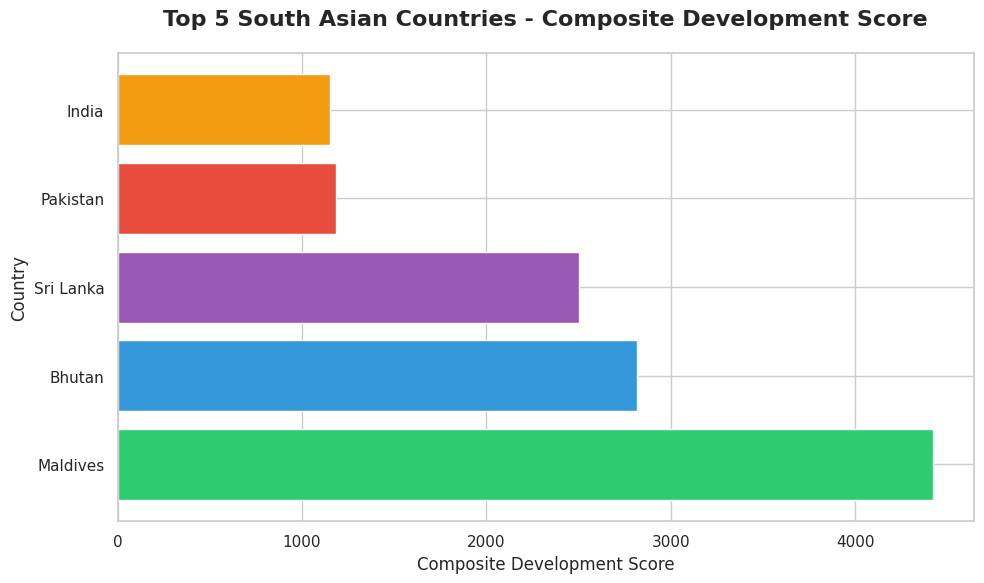

In [ ]:
# Task 2: Composite Development Score
print("\n[TASK 2] Calculating Composite Development Score")
print("Formula: 0.30 × Life Expectancy + 0.30 × GNI per Capita")

df_sa_composite = df_sa.dropna(subset=['life_expectancy', 'gross_inc_percap', 'hdi']).copy()

df_sa_composite['composite_score'] = (
    0.30 * df_sa_composite['life_expectancy'] +
    0.30 * df_sa_composite['gross_inc_percap']
)

# Calculate averages by country
df_country_scores = df_sa_composite.groupby('country').agg({
    'hdi': 'mean',
    'composite_score': 'mean'
}).reset_index()

df_country_scores = df_country_scores.sort_values('composite_score', ascending=False)
df_country_scores['composite_rank'] = range(1, len(df_country_scores) + 1)

# Also add HDI rank for comparison
df_country_scores_hdi = df_country_scores.sort_values('hdi', ascending=False)
df_country_scores_hdi['hdi_rank'] = range(1, len(df_country_scores_hdi) + 1)
df_country_scores = df_country_scores.merge(
    df_country_scores_hdi[['country', 'hdi_rank']], on='country'
)

print("\nSouth Asia Rankings by Composite Score:")
for _, row in df_country_scores.iterrows():
    print(f"   {int(row['composite_rank'])}. {row['country']}: {row['composite_score']:.2f}")

print("\nComparison: Composite Score Rank vs HDI Rank")
for _, row in df_country_scores.iterrows():
    rank_diff = row['hdi_rank'] - row['composite_rank']
    direction = "same" if rank_diff == 0 else ("higher" if rank_diff > 0 else "lower")
    print(f"   {row['country']}: Composite Rank={int(row['composite_rank'])}, HDI Rank={int(row['hdi_rank'])} ({direction})")

# Visualize top 5
df_top5_sa = df_country_scores.head(5)

plt.figure(figsize=(10, 6))
colors_gradient = ['#2ECC71', '#3498DB', '#9B59B6', '#E74C3C', '#F39C12']
plt.barh(df_top5_sa['country'], df_top5_sa['composite_score'], color=colors_gradient)
plt.xlabel('Composite Development Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Top 5 South Asian Countries - Composite Development Score',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()



[TASK 3] Outlier Detection using IQR Method

Found 18 outlier records

Outlier Details:
 country  year   hdi  gross_inc_percap
Maldives  2003 0.655       14543.14634
Maldives  2004 0.656       15287.20714
Maldives  2006 0.670       16391.40757
Maldives  2007 0.670       14162.42816
Maldives  2008 0.682       15423.81910
Maldives  2009 0.684       14050.92438
Maldives  2010 0.692       14363.23615
Maldives  2011 0.701       15300.31364
Maldives  2012 0.708       15355.44089
Maldives  2013 0.715       15648.36655
Maldives  2014 0.723       16410.16419
Maldives  2015 0.728       16414.93039
Maldives  2016 0.734       16911.45422
Maldives  2017 0.740       17474.64201
Maldives  2018 0.747       18055.72465
Maldives  2019 0.753       18679.92536
Maldives  2021 0.753       16857.60546
Maldives  2022 0.762       18846.79219

Why these are outliers:
   Maldives: exceptionally high income


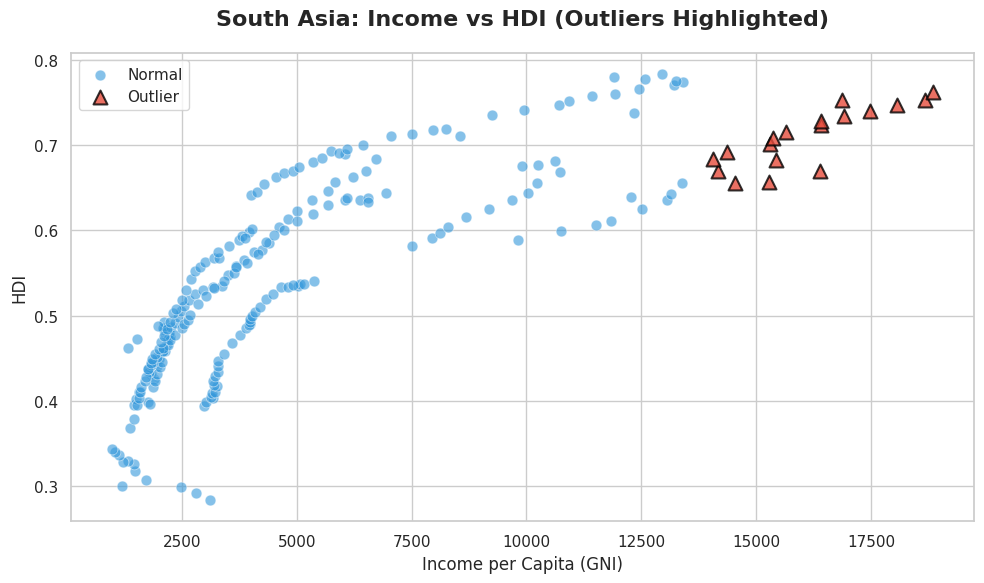

In [ ]:
# Task 3: Outlier Detection
print("\n[TASK 3] Outlier Detection using IQR Method")

df_sa_outlier = df_sa.dropna(subset=['hdi', 'gross_inc_percap']).copy()

# Calculate IQR for HDI
q1_hdi = df_sa_outlier['hdi'].quantile(0.25)
q3_hdi = df_sa_outlier['hdi'].quantile(0.75)
iqr_hdi = q3_hdi - q1_hdi
lower_hdi = q1_hdi - 1.5 * iqr_hdi
upper_hdi = q3_hdi + 1.5 * iqr_hdi

# Calculate IQR for Income
q1_income = df_sa_outlier['gross_inc_percap'].quantile(0.25)
q3_income = df_sa_outlier['gross_inc_percap'].quantile(0.75)
iqr_income = q3_income - q1_income
lower_income = q1_income - 1.5 * iqr_income
upper_income = q3_income + 1.5 * iqr_income

# Flag outliers
df_sa_outlier['is_outlier'] = (
    (df_sa_outlier['hdi'] < lower_hdi) | (df_sa_outlier['hdi'] > upper_hdi) |
    (df_sa_outlier['gross_inc_percap'] < lower_income) |
    (df_sa_outlier['gross_inc_percap'] > upper_income)
)

df_outliers = df_sa_outlier[df_sa_outlier['is_outlier']]
print(f"\nFound {len(df_outliers)} outlier records")

if len(df_outliers) > 0:
    print("\nOutlier Details:")
    print(df_outliers[['country', 'year', 'hdi', 'gross_inc_percap']].to_string(index=False))
    print("\nWhy these are outliers:")
    for country in df_outliers['country'].unique():
        country_data = df_outliers[df_outliers['country'] == country].iloc[0]
        reasons = []
        if country_data['hdi'] > upper_hdi:
            reasons.append("unusually high HDI")
        if country_data['hdi'] < lower_hdi:
            reasons.append("unusually low HDI")
        if country_data['gross_inc_percap'] > upper_income:
            reasons.append("exceptionally high income")
        if country_data['gross_inc_percap'] < lower_income:
            reasons.append("very low income")
        print(f"   {country}: {', '.join(reasons)}")

# Visualize outliers
plt.figure(figsize=(10, 6))
df_normal = df_sa_outlier[~df_sa_outlier['is_outlier']]
df_outlier_points = df_sa_outlier[df_sa_outlier['is_outlier']]

plt.scatter(df_normal['gross_inc_percap'], df_normal['hdi'],
           c='#3498DB', alpha=0.6, s=60, label='Normal', edgecolors='white', linewidth=0.5)
plt.scatter(df_outlier_points['gross_inc_percap'], df_outlier_points['hdi'],
           c='#E74C3C', alpha=0.8, s=100, label='Outlier',
           edgecolors='black', linewidth=1.5, marker='^')

plt.xlabel('Income per Capita (GNI)', fontsize=12)
plt.ylabel('HDI', fontsize=12)
plt.title('South Asia: Income vs HDI (Outliers Highlighted)',
          fontsize=16, fontweight='bold', pad=20)
plt.legend()
plt.tight_layout()
plt.show()



[TASK 4] Exploring Metric Relationships

Pearson Correlations with HDI:
   Gender Development Index: 0.8656
   Life Expectancy Index: 0.9488

Strongest relationship with HDI: Life Expectancy (r=0.9488)
Weakest relationship with HDI: Gender Development (r=0.8656)


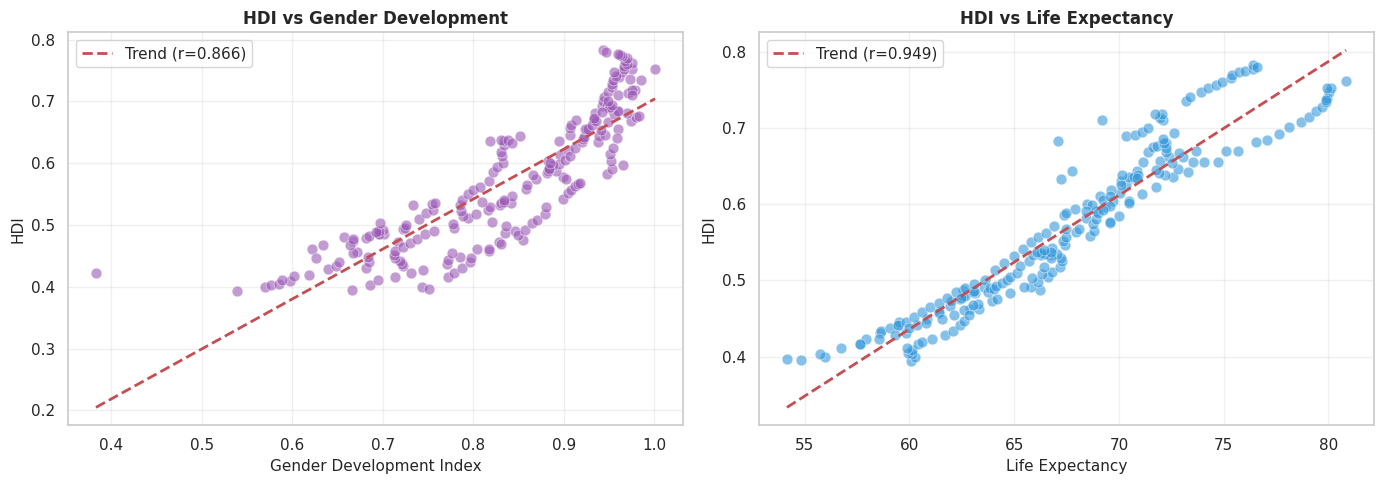

In [ ]:
# Task 4: Exploring Metric Relationships (MISSING - NOW ADDED)
print("\n[TASK 4] Exploring Metric Relationships")

df_sa_metrics = df_sa.dropna(subset=['hdi', 'gender_development', 'life_expectancy']).copy()

# Compute Pearson correlations
corr_gender = df_sa_metrics['hdi'].corr(df_sa_metrics['gender_development'])
corr_life = df_sa_metrics['hdi'].corr(df_sa_metrics['life_expectancy'])

print(f"\nPearson Correlations with HDI:")
print(f"   Gender Development Index: {corr_gender:.4f}")
print(f"   Life Expectancy Index: {corr_life:.4f}")

# Determine strongest and weakest
metrics_corr = {
    'Gender Development': corr_gender,
    'Life Expectancy': corr_life
}
strongest = max(metrics_corr, key=lambda k: abs(metrics_corr[k]))
weakest = min(metrics_corr, key=lambda k: abs(metrics_corr[k]))

print(f"\nStrongest relationship with HDI: {strongest} (r={metrics_corr[strongest]:.4f})")
print(f"Weakest relationship with HDI: {weakest} (r={metrics_corr[weakest]:.4f})")

# Create scatter plots with trendlines
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gender Development vs HDI
axes[0].scatter(df_sa_metrics['gender_development'], df_sa_metrics['hdi'],
               alpha=0.6, c='#9B59B6', s=60, edgecolors='white', linewidth=0.5)
z1 = np.polyfit(df_sa_metrics['gender_development'].dropna(),
                df_sa_metrics.loc[df_sa_metrics['gender_development'].notna(), 'hdi'], 1)
p1 = np.poly1d(z1)
x_vals = np.linspace(df_sa_metrics['gender_development'].min(),
                     df_sa_metrics['gender_development'].max(), 100)
axes[0].plot(x_vals, p1(x_vals), "r--", linewidth=2, label=f'Trend (r={corr_gender:.3f})')
axes[0].set_xlabel('Gender Development Index', fontsize=11)
axes[0].set_ylabel('HDI', fontsize=11)
axes[0].set_title('HDI vs Gender Development', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Life Expectancy vs HDI
axes[1].scatter(df_sa_metrics['life_expectancy'], df_sa_metrics['hdi'],
               alpha=0.6, c='#3498DB', s=60, edgecolors='white', linewidth=0.5)
z2 = np.polyfit(df_sa_metrics['life_expectancy'].dropna(),
                df_sa_metrics.loc[df_sa_metrics['life_expectancy'].notna(), 'hdi'], 1)
p2 = np.poly1d(z2)
x_vals2 = np.linspace(df_sa_metrics['life_expectancy'].min(),
                      df_sa_metrics['life_expectancy'].max(), 100)
axes[1].plot(x_vals2, p2(x_vals2), "r--", linewidth=2, label=f'Trend (r={corr_life:.3f})')
axes[1].set_xlabel('Life Expectancy', fontsize=11)
axes[1].set_ylabel('HDI', fontsize=11)
axes[1].set_title('HDI vs Life Expectancy', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()



[TASK 5] Gap Analysis (GNI_HDI_Gap)

Top 3 Positive Gaps (High Income, Lower HDI than expected):
   Maldives: Gap=14670.64 (GNI=14671.3, HDI=0.682)
   Bhutan: Gap=9320.18 (GNI=9320.8, HDI=0.635)
   Sri Lanka: Gap=8268.37 (GNI=8269.1, HDI=0.716)

Top 3 Negative Gaps (Lower Income, Higher HDI than expected):
   Afghanistan: Gap=1793.49 (GNI=1793.9, HDI=0.401)
   Nepal: Gap=2532.44 (GNI=2532.9, HDI=0.504)
   Bangladesh: Gap=3408.49 (GNI=3409.0, HDI=0.531)


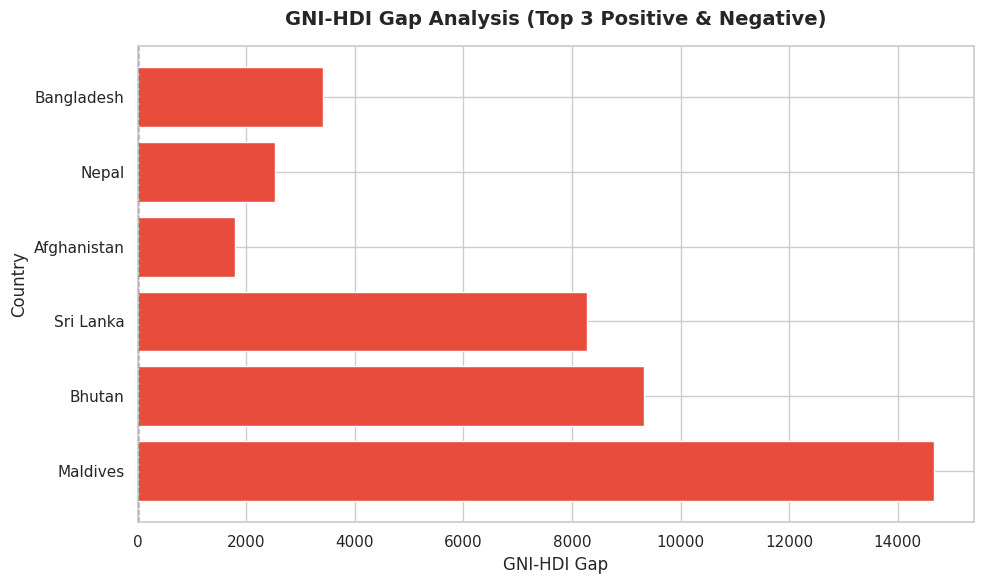


Implications of GNI-HDI Gap:
• Positive gap: Country has high income but HDI lower than expected
  → May indicate inequality, poor health/education systems despite wealth
• Negative gap: Country has lower income but HDI higher than expected
  → May indicate effective social programs, good governance


In [ ]:
# Task 5: Gap Analysis (MISSING - NOW ADDED)
print("\n[TASK 5] Gap Analysis (GNI_HDI_Gap)")

df_sa_gap = df_sa.dropna(subset=['gross_inc_percap', 'hdi']).copy()

# Create GNI_HDI_Gap metric
df_sa_gap['GNI_HDI_Gap'] = df_sa_gap['gross_inc_percap'] - df_sa_gap['hdi']

# Calculate average gap by country
df_gap_by_country = df_sa_gap.groupby('country').agg({
    'GNI_HDI_Gap': 'mean',
    'gross_inc_percap': 'mean',
    'hdi': 'mean'
}).reset_index()

# Rank by gap (descending and ascending)
df_gap_desc = df_gap_by_country.sort_values('GNI_HDI_Gap', ascending=False)
df_gap_asc = df_gap_by_country.sort_values('GNI_HDI_Gap', ascending=True)

print("\nTop 3 Positive Gaps (High Income, Lower HDI than expected):")
for i, row in df_gap_desc.head(3).iterrows():
    print(f"   {row['country']}: Gap={row['GNI_HDI_Gap']:.2f} (GNI={row['gross_inc_percap']:.1f}, HDI={row['hdi']:.3f})")

print("\nTop 3 Negative Gaps (Lower Income, Higher HDI than expected):")
for i, row in df_gap_asc.head(3).iterrows():
    print(f"   {row['country']}: Gap={row['GNI_HDI_Gap']:.2f} (GNI={row['gross_inc_percap']:.1f}, HDI={row['hdi']:.3f})")

# Visualize gaps
top3_positive = df_gap_desc.head(3)
top3_negative = df_gap_asc.head(3)
df_gap_viz = pd.concat([top3_positive, top3_negative])

plt.figure(figsize=(10, 6))
colors = ['#E74C3C' if x > 0 else '#2ECC71' for x in df_gap_viz['GNI_HDI_Gap']]
plt.barh(df_gap_viz['country'], df_gap_viz['GNI_HDI_Gap'], color=colors)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('GNI-HDI Gap', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('GNI-HDI Gap Analysis (Top 3 Positive & Negative)',
          fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

print("\nImplications of GNI-HDI Gap:")
print("• Positive gap: Country has high income but HDI lower than expected")
print("  → May indicate inequality, poor health/education systems despite wealth")
print("• Negative gap: Country has lower income but HDI higher than expected")
print("  → May indicate effective social programs, good governance")


# ============================================================================

In [ ]:
# PROBLEM 3: Comparative Regional Analysis - South Asia vs Middle East
# ============================================================================

print("\n\n" + "=" * 80)
print("PROBLEM 3: COMPARATIVE REGIONAL ANALYSIS")
print("South Asia vs Middle East (2020-2022)")
print("=" * 80)




PROBLEM 3: COMPARATIVE REGIONAL ANALYSIS
South Asia vs Middle East (2020-2022)


In [ ]:
# Task 1: Create Middle East Subset - CORRECT FILENAMES
print("\n[TASK 1] Creating Regional Subsets")

# Define Middle East countries (matching exact names in dataset)
middle_east_countries = [
    'Bahrain', 'Iran (Islamic Republic of)', 'Iraq', 'Israel', 'Jordan',
    'Kuwait', 'Lebanon', 'Oman', 'Palestine, State of', 'Qatar',
    'Saudi Arabia', 'Syrian Arab Republic', 'United Arab Emirates', 'Yemen'
]

# Filter from Problem 1B dataset (2020-2022)
df_problem1b = pd.read_csv(OUTPUT_DIR / 'HDI_problem1B.csv')

df_sa_recent = df_problem1b[df_problem1b['country'].isin(south_asian_countries)].copy()
df_sa_recent['region_name'] = 'South Asia'

df_me_recent = df_problem1b[df_problem1b['country'].isin(middle_east_countries)].copy()
df_me_recent['region_name'] = 'Middle East'

print(f"South Asia (2020-2022): {len(df_sa_recent)} records")
print(f"Middle East (2020-2022): {len(df_me_recent)} records")

# Save with CORRECT filenames
sa_recent_file = OUTPUT_DIR / 'HDI_SouthAsia_2020_2022.csv'
me_recent_file = OUTPUT_DIR / 'HDI_MiddleEast_2020_2022.csv'
df_sa_recent.to_csv(sa_recent_file, index=False)
df_me_recent.to_csv(me_recent_file, index=False)
print(f"[SAVED] {sa_recent_file}")
print(f"[SAVED] {me_recent_file}")

# Combine regions
df_comparison = pd.concat([df_sa_recent, df_me_recent], ignore_index=True)



[TASK 1] Creating Regional Subsets
South Asia (2020-2022): 24 records
Middle East (2020-2022): 42 records
[SAVED] HDI_SouthAsia_2020_2022.csv
[SAVED] HDI_MiddleEast_2020_2022.csv



[TASK 2] Descriptive Statistics

Regional HDI Statistics (2020-2022):
region_name     mean      std   min   max  count  range       cv
Middle East 0.766452 0.139100 0.424 0.937     42  0.513 0.181486
 South Asia 0.639583 0.098273 0.462 0.783     24  0.321 0.153652

→ Better performing region: Middle East (Mean HDI: 0.7665)


/tmp/ipython-input-1229958952.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_regional_stats, x='region_name', y='mean',


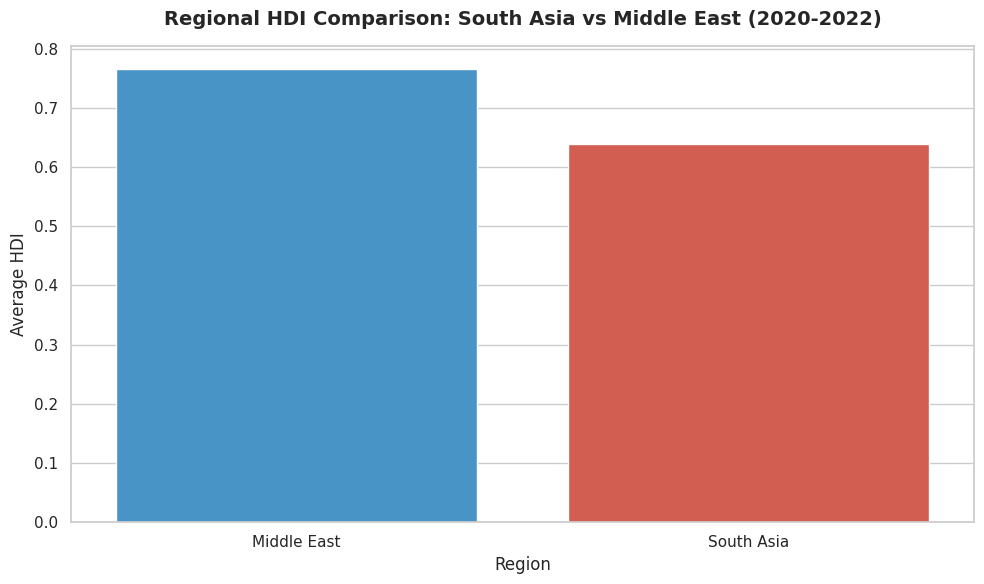

In [ ]:
# Task 2: Descriptive Statistics
print("\n[TASK 2] Descriptive Statistics")

df_regional_stats = df_comparison.groupby('region_name')['hdi'].agg([
    ('mean', 'mean'),
    ('std', 'std'),
    ('min', 'min'),
    ('max', 'max'),
    ('count', 'count')
]).reset_index()

df_regional_stats['range'] = df_regional_stats['max'] - df_regional_stats['min']
df_regional_stats['cv'] = df_regional_stats['std'] / df_regional_stats['mean']

print("\nRegional HDI Statistics (2020-2022):")
print(df_regional_stats.to_string(index=False))

better_region = df_regional_stats.loc[df_regional_stats['mean'].idxmax(), 'region_name']
better_mean = df_regional_stats.loc[df_regional_stats['mean'].idxmax(), 'mean']
print(f"\n→ Better performing region: {better_region} (Mean HDI: {better_mean:.4f})")

# Visualize regional comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=df_regional_stats, x='region_name', y='mean',
           palette=['#3498DB', '#E74C3C'])
plt.ylabel('Average HDI', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.title('Regional HDI Comparison: South Asia vs Middle East (2020-2022)',
         fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()



[TASK 3] Top and Bottom Performers

Top 3 performers by region:

South Asia:
   1. Sri Lanka: 0.780
   2. Maldives: 0.751
   3. Bhutan: 0.678

Middle East:
   1. United Arab Emirates: 0.933
   2. Israel: 0.911
   3. Bahrain: 0.885

Bottom 3 performers by region:

South Asia:
   1. Afghanistan: 0.474
   2. Pakistan: 0.538
   3. Nepal: 0.595

Middle East:
   1. Yemen: 0.426
   2. Syrian Arab Republic: 0.559
   3. Iraq: 0.667


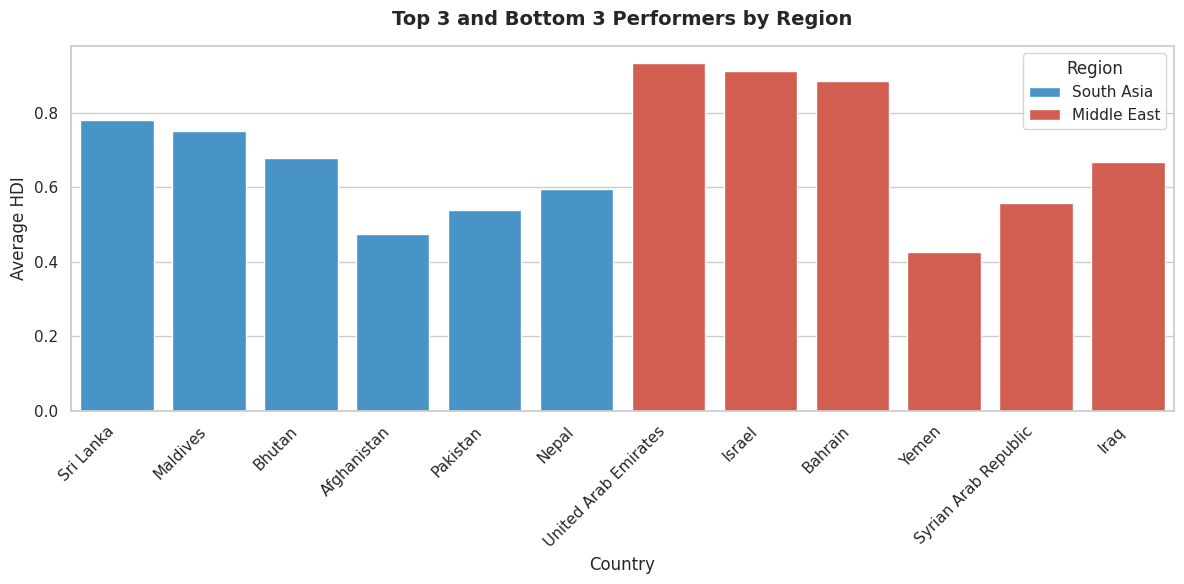

In [ ]:
# Task 3: Top and Bottom Performers
print("\n[TASK 3] Top and Bottom Performers")

df_avg_by_country = df_comparison.groupby(['country', 'region_name'])['hdi'].mean().reset_index()

print("\nTop 3 performers by region:")
for region in ['South Asia', 'Middle East']:
    top3 = df_avg_by_country[df_avg_by_country['region_name'] == region].nlargest(3, 'hdi')
    print(f"\n{region}:")
    for i, row in enumerate(top3.itertuples(), 1):
        print(f"   {i}. {row.country}: {row.hdi:.3f}")

print("\nBottom 3 performers by region:")
for region in ['South Asia', 'Middle East']:
    bottom3 = df_avg_by_country[df_avg_by_country['region_name'] == region].nsmallest(3, 'hdi')
    print(f"\n{region}:")
    for i, row in enumerate(bottom3.itertuples(), 1):
        print(f"   {i}. {row.country}: {row.hdi:.3f}")

# Create bar chart comparing top and bottom
df_top_bottom = pd.concat([
    df_avg_by_country[df_avg_by_country['region_name'] == 'South Asia'].nlargest(3, 'hdi'),
    df_avg_by_country[df_avg_by_country['region_name'] == 'South Asia'].nsmallest(3, 'hdi'),
    df_avg_by_country[df_avg_by_country['region_name'] == 'Middle East'].nlargest(3, 'hdi'),
    df_avg_by_country[df_avg_by_country['region_name'] == 'Middle East'].nsmallest(3, 'hdi')
])

plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_bottom, x='country', y='hdi', hue='region_name',
           palette=['#3498DB', '#E74C3C'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average HDI', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.title('Top 3 and Bottom 3 Performers by Region', fontsize=14, fontweight='bold', pad=15)
plt.legend(title='Region')
plt.tight_layout()
plt.show()



[TASK 4] Metric Comparisons

Average Metrics by Region:
region_name  gender_development  life_expectancy  gross_inc_percap
Middle East            0.887452        75.340857      31432.891216
 South Asia            0.881458        70.970083       7766.509931

gender_development: Difference = 0.01

life_expectancy: Difference = 4.37

gross_inc_percap: Difference = 23666.38


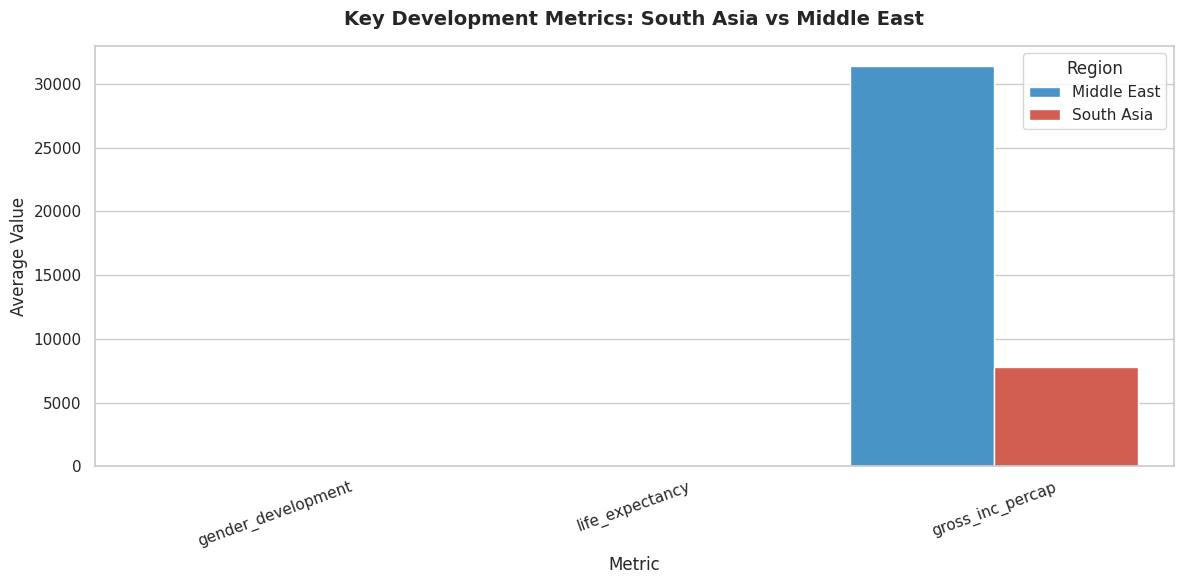


Greatest disparity: gross_inc_percap (difference: 23666.38)


In [ ]:
# Task 4: Metric Comparisons
print("\n[TASK 4] Metric Comparisons")

metrics_to_compare = ['gender_development', 'life_expectancy', 'gross_inc_percap']
available_metrics = [m for m in metrics_to_compare if m in df_comparison.columns]

df_metric_comparison = df_comparison.groupby('region_name')[available_metrics].mean().reset_index()

print("\nAverage Metrics by Region:")
print(df_metric_comparison.to_string(index=False))

# Calculate differences
for metric in available_metrics:
    sa_val = df_metric_comparison.loc[df_metric_comparison['region_name'] == 'South Asia', metric].values[0]
    me_val = df_metric_comparison.loc[df_metric_comparison['region_name'] == 'Middle East', metric].values[0]
    diff = abs(me_val - sa_val)
    print(f"\n{metric}: Difference = {diff:.2f}")

# Visualize metric comparison
df_comparison_long = df_metric_comparison.melt(
    id_vars='region_name', var_name='metric', value_name='average')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_comparison_long, x='metric', y='average',
           hue='region_name', palette=['#3498DB', '#E74C3C'])
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.title('Key Development Metrics: South Asia vs Middle East',
         fontsize=14, fontweight='bold', pad=15)
plt.xticks(rotation=20)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

# Identify greatest disparity
disparities = {}
for metric in available_metrics:
    sa_val = df_metric_comparison.loc[df_metric_comparison['region_name'] == 'South Asia', metric].values[0]
    me_val = df_metric_comparison.loc[df_metric_comparison['region_name'] == 'Middle East', metric].values[0]
    disparities[metric] = abs(me_val - sa_val)

greatest_disparity_metric = max(disparities, key=disparities.get)
print(f"\nGreatest disparity: {greatest_disparity_metric} (difference: {disparities[greatest_disparity_metric]:.2f})")



[TASK 5] HDI Disparity Analysis

Range (max - min):
   South Asia: 0.3210
   Middle East: 0.5130

Coefficient of Variation (CV):
   South Asia: 0.1537
   Middle East: 0.1815

→ Region with more variation: Middle East
   (Higher CV indicates greater inequality between countries)


/tmp/ipython-input-869998691.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comparison, x='region_name', y='hdi',


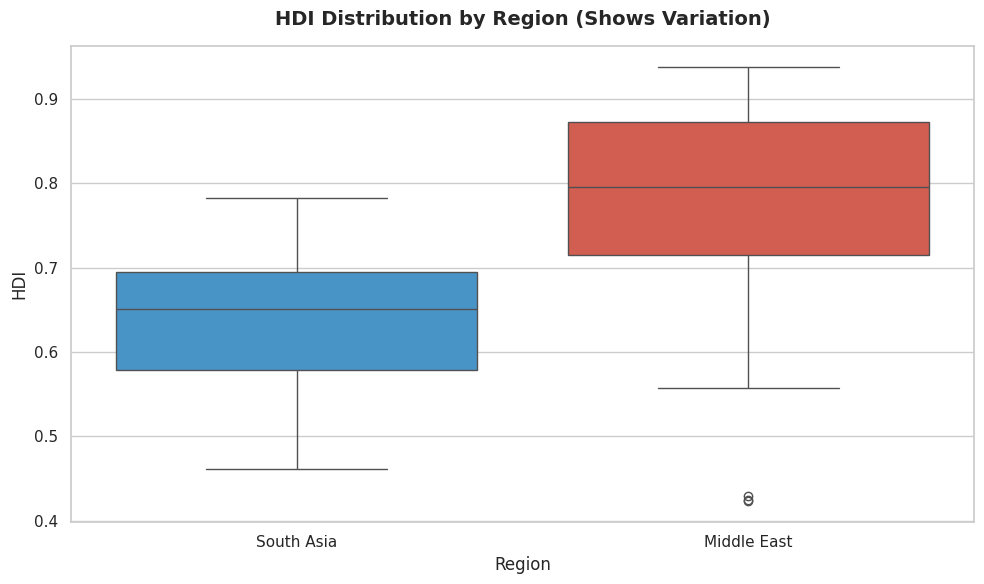

In [ ]:
# Task 5: HDI Disparity
print("\n[TASK 5] HDI Disparity Analysis")

print(f"\nRange (max - min):")
for region in ['South Asia', 'Middle East']:
    region_data = df_regional_stats[df_regional_stats['region_name'] == region]
    print(f"   {region}: {region_data['range'].values[0]:.4f}")

print(f"\nCoefficient of Variation (CV):")
for region in ['South Asia', 'Middle East']:
    region_data = df_regional_stats[df_regional_stats['region_name'] == region]
    print(f"   {region}: {region_data['cv'].values[0]:.4f}")

more_varied = df_regional_stats.loc[df_regional_stats['cv'].idxmax(), 'region_name']
print(f"\n→ Region with more variation: {more_varied}")
print("   (Higher CV indicates greater inequality between countries)")

# Visualize variation with box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_comparison, x='region_name', y='hdi',
           palette=['#3498DB', '#E74C3C'])
plt.ylabel('HDI', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.title('HDI Distribution by Region (Shows Variation)',
         fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()



[TASK 6] Correlation Analysis

South Asia:
   HDI vs Gender Development: r = 0.8742
   HDI vs Life Expectancy: r = 0.9388

Middle East:
   HDI vs Gender Development: r = 0.9025
   HDI vs Life Expectancy: r = 0.9107


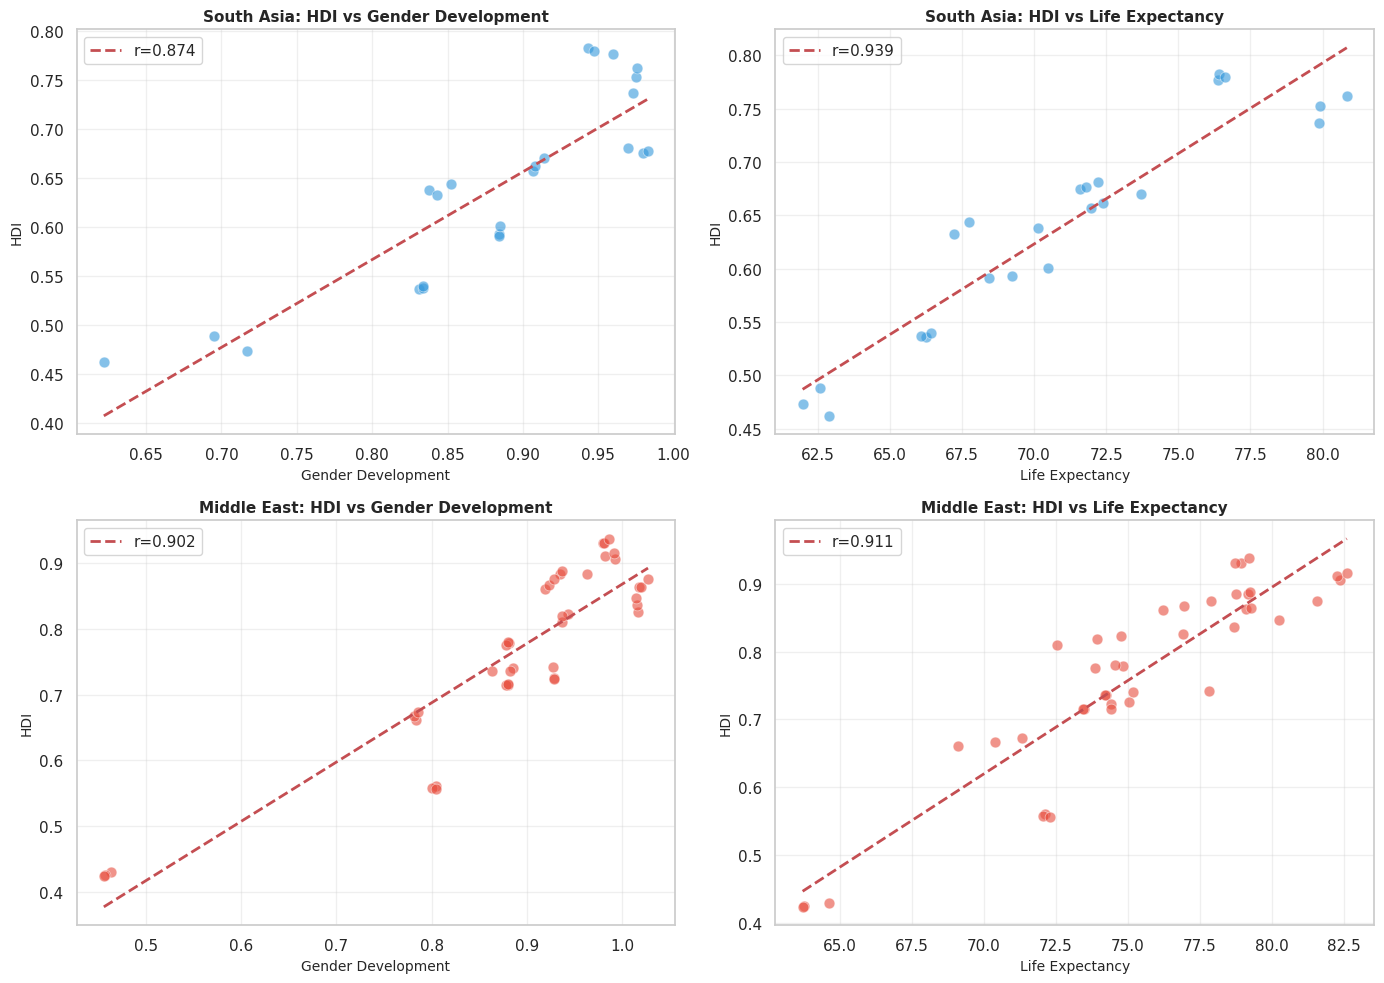


Interpretation:
• Positive correlation: As the metric increases, HDI tends to increase
• Correlation strength: |r| > 0.7 (strong), 0.4-0.7 (moderate), < 0.4 (weak)


In [ ]:
# Task 6: Correlation Analysis
print("\n[TASK 6] Correlation Analysis")

for region in ['South Asia', 'Middle East']:
    print(f"\n{region}:")
    df_region = df_comparison[df_comparison['region_name'] == region].copy()
    df_region_corr = df_region.dropna(subset=['hdi', 'gender_development', 'life_expectancy'])

    if len(df_region_corr) > 0:
        corr_gender = df_region_corr['hdi'].corr(df_region_corr['gender_development'])
        corr_life = df_region_corr['hdi'].corr(df_region_corr['life_expectancy'])

        print(f"   HDI vs Gender Development: r = {corr_gender:.4f}")
        print(f"   HDI vs Life Expectancy: r = {corr_life:.4f}")

# Create scatter plots with trendlines for each region
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

regions = ['South Asia', 'Middle East']
colors_map = {'South Asia': '#3498DB', 'Middle East': '#E74C3C'}

for idx, region in enumerate(regions):
    df_region = df_comparison[df_comparison['region_name'] == region].copy()
    df_region_plot = df_region.dropna(subset=['hdi', 'gender_development', 'life_expectancy'])

    if len(df_region_plot) > 1:
        # Gender Development vs HDI
        corr_g = df_region_plot['hdi'].corr(df_region_plot['gender_development'])
        axes[idx, 0].scatter(df_region_plot['gender_development'], df_region_plot['hdi'],
                            alpha=0.6, c=colors_map[region], s=60, edgecolors='white', linewidth=0.5)
        z1 = np.polyfit(df_region_plot['gender_development'], df_region_plot['hdi'], 1)
        p1 = np.poly1d(z1)
        x_vals = np.linspace(df_region_plot['gender_development'].min(),
                            df_region_plot['gender_development'].max(), 100)
        axes[idx, 0].plot(x_vals, p1(x_vals), "r--", linewidth=2, label=f'r={corr_g:.3f}')
        axes[idx, 0].set_xlabel('Gender Development', fontsize=10)
        axes[idx, 0].set_ylabel('HDI', fontsize=10)
        axes[idx, 0].set_title(f'{region}: HDI vs Gender Development', fontsize=11, fontweight='bold')
        axes[idx, 0].legend()
        axes[idx, 0].grid(alpha=0.3)

        # Life Expectancy vs HDI
        corr_l = df_region_plot['hdi'].corr(df_region_plot['life_expectancy'])
        axes[idx, 1].scatter(df_region_plot['life_expectancy'], df_region_plot['hdi'],
                            alpha=0.6, c=colors_map[region], s=60, edgecolors='white', linewidth=0.5)
        z2 = np.polyfit(df_region_plot['life_expectancy'], df_region_plot['hdi'], 1)
        p2 = np.poly1d(z2)
        x_vals2 = np.linspace(df_region_plot['life_expectancy'].min(),
                             df_region_plot['life_expectancy'].max(), 100)
        axes[idx, 1].plot(x_vals2, p2(x_vals2), "r--", linewidth=2, label=f'r={corr_l:.3f}')
        axes[idx, 1].set_xlabel('Life Expectancy', fontsize=10)
        axes[idx, 1].set_ylabel('HDI', fontsize=10)
        axes[idx, 1].set_title(f'{region}: HDI vs Life Expectancy', fontsize=11, fontweight='bold')
        axes[idx, 1].legend()
        axes[idx, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("• Positive correlation: As the metric increases, HDI tends to increase")
print("• Correlation strength: |r| > 0.7 (strong), 0.4-0.7 (moderate), < 0.4 (weak)")



[TASK 7] Regional Outlier Detection

South Asia:
   Found 0 outlier records

Middle East:
   Found 3 outlier records
   Outlier countries: Yemen


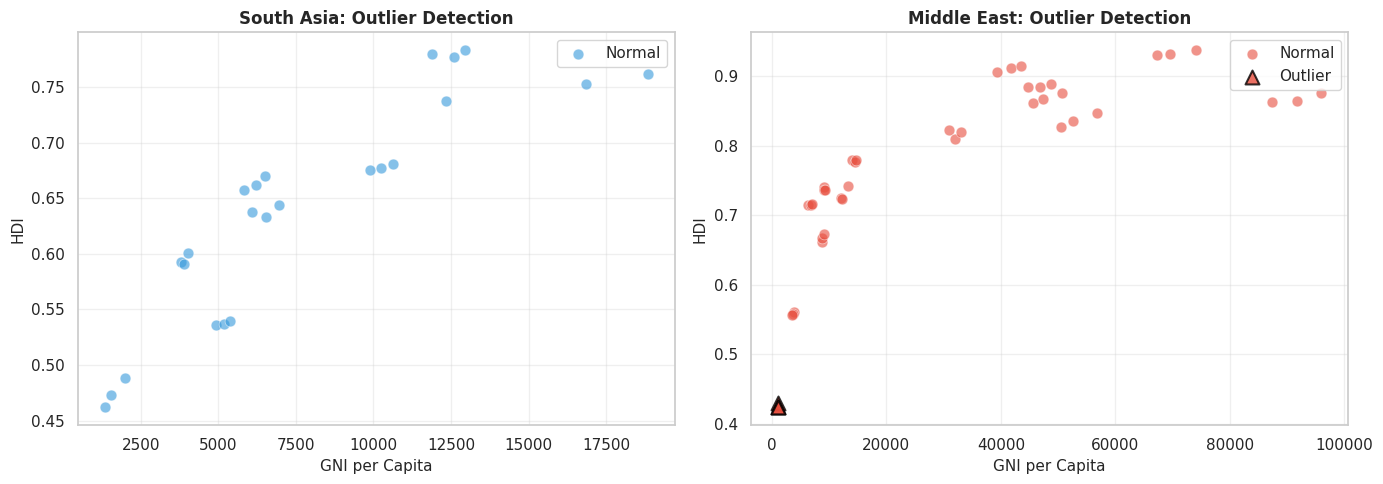


Significance of outliers:
• Outliers may represent:
  - Countries with unique economic structures (e.g., oil-rich nations)
  - Countries facing conflict or crisis
  - Data quality issues
  - Countries with exceptional social programs despite income levels


ANALYSIS COMPLETE!

[FILES GENERATED]
   ✓ HDI_category_added.csv
   ✓ HDI_problem1B.csv
   ✓ HDI_SouthAsia.csv
   ✓ HDI_SouthAsia_2020_2022.csv
   ✓ HDI_MiddleEast_2020_2022.csv

[ALL REQUIREMENTS COMPLETED]
   ✓ Problem 1A: All 6 tasks completed
   ✓ Problem 1B: All 4 tasks completed
   ✓ Problem 2: All 5 tasks completed (including missing Tasks 4 & 5)
   ✓ Problem 3: All 7 tasks completed (including missing Tasks 6 & 7)



In [ ]:
# Task 7: Outlier Detection
print("\n[TASK 7] Regional Outlier Detection")

for region in ['South Asia', 'Middle East']:
    print(f"\n{region}:")
    df_region = df_comparison[df_comparison['region_name'] == region].copy()
    df_region_outlier = df_region.dropna(subset=['hdi', 'gross_inc_percap'])

    if len(df_region_outlier) > 0:
        # IQR for HDI
        q1_hdi = df_region_outlier['hdi'].quantile(0.25)
        q3_hdi = df_region_outlier['hdi'].quantile(0.75)
        iqr_hdi = q3_hdi - q1_hdi
        lower_hdi = q1_hdi - 1.5 * iqr_hdi
        upper_hdi = q3_hdi + 1.5 * iqr_hdi

        # IQR for GNI
        q1_gni = df_region_outlier['gross_inc_percap'].quantile(0.25)
        q3_gni = df_region_outlier['gross_inc_percap'].quantile(0.75)
        iqr_gni = q3_gni - q1_gni
        lower_gni = q1_gni - 1.5 * iqr_gni
        upper_gni = q3_gni + 1.5 * iqr_gni

        # Flag outliers
        df_region_outlier['is_outlier'] = (
            (df_region_outlier['hdi'] < lower_hdi) | (df_region_outlier['hdi'] > upper_hdi) |
            (df_region_outlier['gross_inc_percap'] < lower_gni) |
            (df_region_outlier['gross_inc_percap'] > upper_gni)
        )

        outliers = df_region_outlier[df_region_outlier['is_outlier']]
        print(f"   Found {len(outliers)} outlier records")

        if len(outliers) > 0:
            outlier_countries = outliers['country'].unique()
            print(f"   Outlier countries: {', '.join(outlier_countries)}")

# Create scatter plots showing outliers for both regions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, region in enumerate(['South Asia', 'Middle East']):
    df_region = df_comparison[df_comparison['region_name'] == region].copy()
    df_region_plot = df_region.dropna(subset=['hdi', 'gross_inc_percap'])

    if len(df_region_plot) > 0:
        # Calculate IQR
        q1_hdi = df_region_plot['hdi'].quantile(0.25)
        q3_hdi = df_region_plot['hdi'].quantile(0.75)
        iqr_hdi = q3_hdi - q1_hdi
        lower_hdi = q1_hdi - 1.5 * iqr_hdi
        upper_hdi = q3_hdi + 1.5 * iqr_hdi

        q1_gni = df_region_plot['gross_inc_percap'].quantile(0.25)
        q3_gni = df_region_plot['gross_inc_percap'].quantile(0.75)
        iqr_gni = q3_gni - q1_gni
        lower_gni = q1_gni - 1.5 * iqr_gni
        upper_gni = q3_gni + 1.5 * iqr_gni

        df_region_plot['is_outlier'] = (
            (df_region_plot['hdi'] < lower_hdi) | (df_region_plot['hdi'] > upper_hdi) |
            (df_region_plot['gross_inc_percap'] < lower_gni) |
            (df_region_plot['gross_inc_percap'] > upper_gni)
        )

        normal = df_region_plot[~df_region_plot['is_outlier']]
        outliers = df_region_plot[df_region_plot['is_outlier']]

        axes[idx].scatter(normal['gross_inc_percap'], normal['hdi'],
                         c=colors_map[region], alpha=0.6, s=60,
                         label='Normal', edgecolors='white', linewidth=0.5)

        if len(outliers) > 0:
            axes[idx].scatter(outliers['gross_inc_percap'], outliers['hdi'],
                             c='#E74C3C', alpha=0.8, s=100, marker='^',
                             label='Outlier', edgecolors='black', linewidth=1.5)

        axes[idx].set_xlabel('GNI per Capita', fontsize=11)
        axes[idx].set_ylabel('HDI', fontsize=11)
        axes[idx].set_title(f'{region}: Outlier Detection', fontsize=12, fontweight='bold')
        axes[idx].legend()
        axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nSignificance of outliers:")
print("• Outliers may represent:")
print("  - Countries with unique economic structures (e.g., oil-rich nations)")
print("  - Countries facing conflict or crisis")
print("  - Data quality issues")
print("  - Countries with exceptional social programs despite income levels")


# ============================================================================
# FINAL SUMMARY
# ============================================================================

print("\n\n" + "=" * 80)
print("ANALYSIS COMPLETE!")
print("=" * 80)
print("\n[FILES GENERATED]")
print("   ✓ HDI_category_added.csv")
print("   ✓ HDI_problem1B.csv")
print("   ✓ HDI_SouthAsia.csv")
print("   ✓ HDI_SouthAsia_2020_2022.csv")
print("   ✓ HDI_MiddleEast_2020_2022.csv")
print("\n[ALL REQUIREMENTS COMPLETED]")
print("   ✓ Problem 1A: All 6 tasks completed")
print("   ✓ Problem 1B: All 4 tasks completed")
print("   ✓ Problem 2: All 5 tasks completed (including missing Tasks 4 & 5)")
print("   ✓ Problem 3: All 7 tasks completed (including missing Tasks 6 & 7)")
print("\n" + "=" * 80)